In [30]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Data Loading
# 2. EDA - Data Visualization
# 3. Data Cleaning
# 4. Features Selection
# 5. Data Preprocessing
# 6. Train Machine Learning Model
# 7. Evaluate Model - Classification report
# 8. Fine Tuning Model

In [3]:
#1. Data loading

iris = datasets.load_iris()

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
X = iris['data']

In [7]:
y = iris['target']

In [32]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [33]:
df = pd.DataFrame(X,columns=iris.feature_names )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

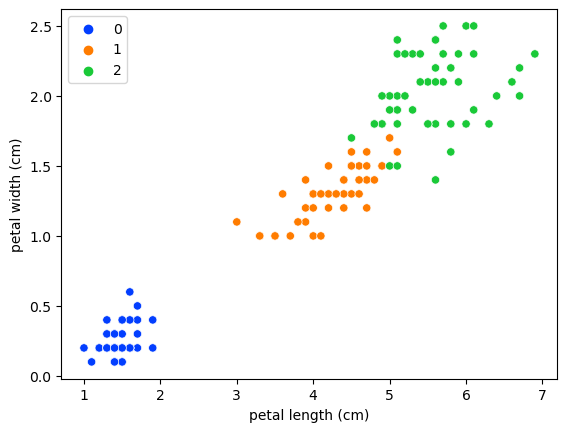

In [12]:
#2. Data Visualization
# scatterplot "Sepal Length" against "Sepal Width"
# scatterplot "Petal Length" against "Petal Width"

sns.scatterplot(data= df , x="petal length (cm)", y="petal width (cm)", hue = y, palette = "bright")

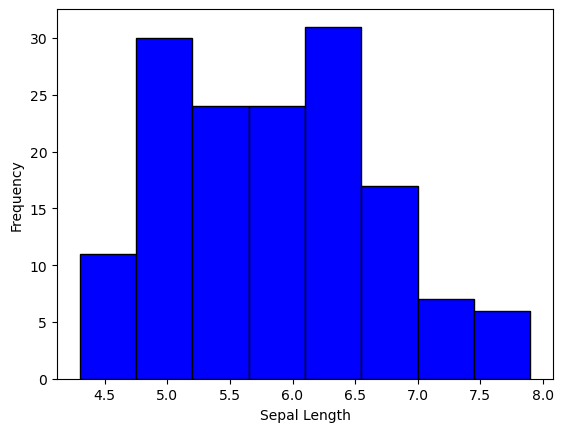

In [13]:
plt.hist(df['sepal length (cm)'], color = "blue", edgecolor = "black", bins = 8)
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()

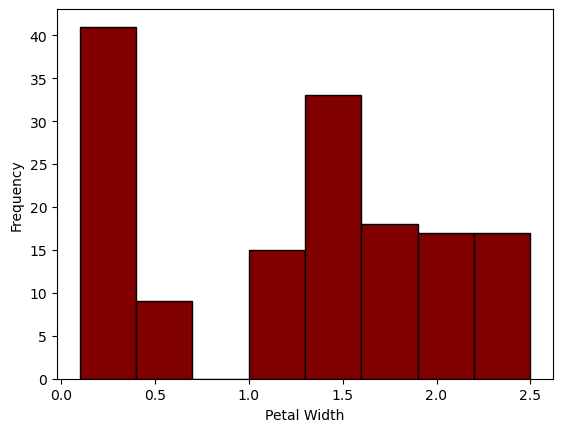

In [14]:
plt.hist(df['petal width (cm)'], color = "maroon", edgecolor = "black", bins = 8)
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.show()

c:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


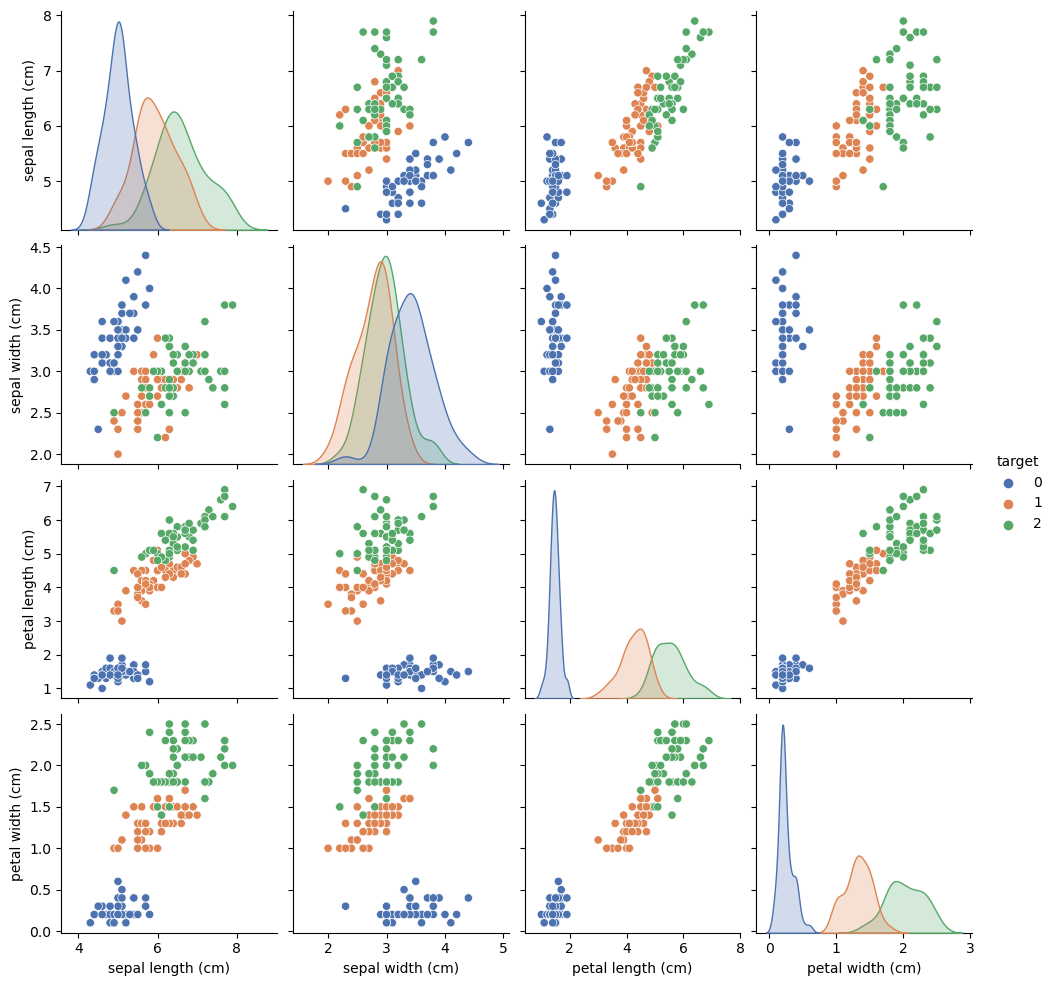

In [34]:
#pairplot
df['target'] = y

sns.pairplot (df, hue = 'target', palette = 'deep')
plt.show()

In [16]:
# 2.Data Visualization
# correlation matrix heatmap
# calculating the correlation coefficient
corr= df.corr()
print(corr)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


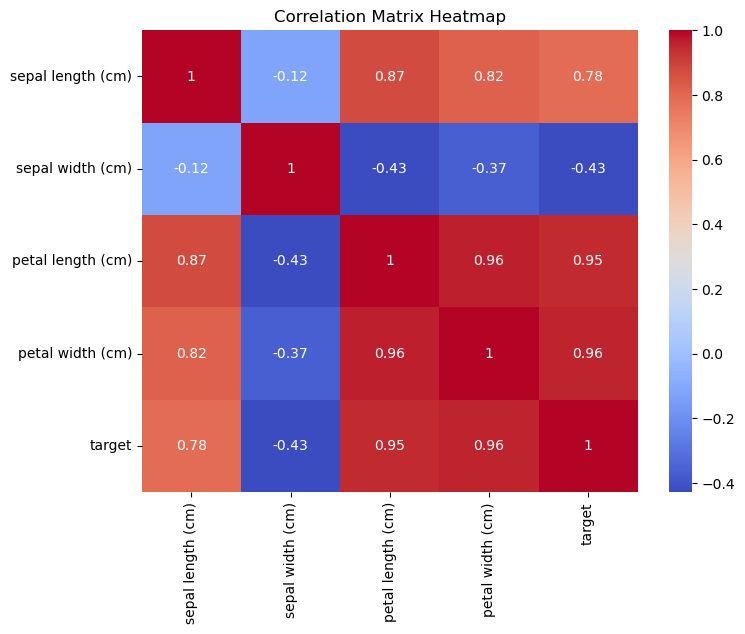

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot= True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#Corr is a measure of a linear relationship and it assumes both variables are continous

In [18]:
#correlation between features(exclude the target class) - our target is a categorial data
df = df.drop('target', axis=1)

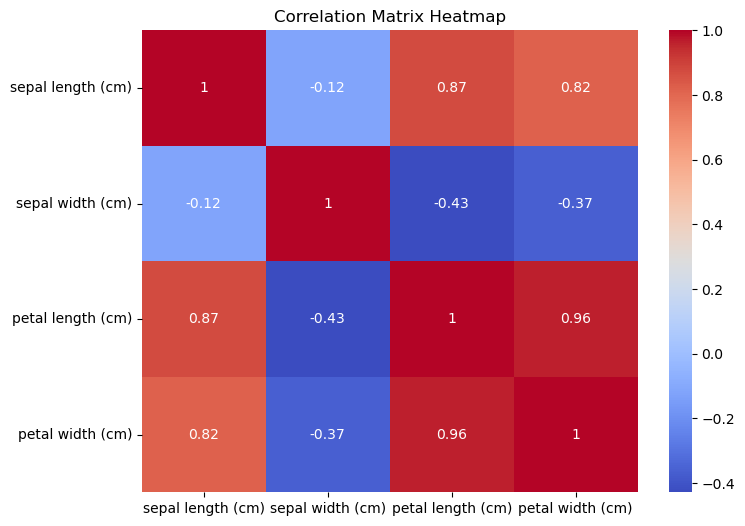

In [19]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot= True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: >

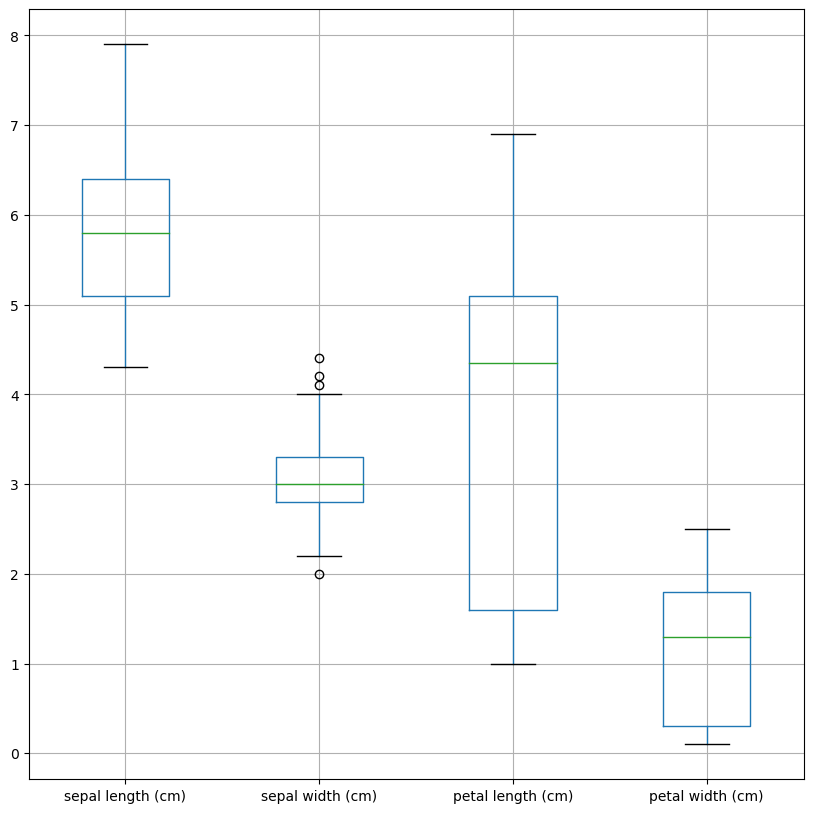

In [20]:
#3.Data Cleaning
plt.figure(figsize = (10,10))
df.boxplot()

In [35]:
#check for duplicates
df.duplicated().sum() #toal 1 duplicate in the dataset

1

In [36]:
#check if there are any duplicates
print(df.duplicated().any())

True


In [23]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [24]:
#show duplicated data
z= df[df.duplicated()]

In [25]:
print(z)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
142                5.8               2.7                5.1               1.9


In [26]:
#drop duplicated data
df.drop_duplicates(inplace = True) #modify the data directly

In [27]:
print(df.info)

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[149 rows x 4 columns]>


In [28]:
#to check if there is still any duplicated data
df.duplicated().any()

False

In [37]:
#5. Data preprocessing

#splitting train dataset and test dataset

from sklearn.model_selection import train_test_split

#split the df info Features and Target

X = df.drop('target', axis = 1) #Feature
y = df['target'] #target

#split the data into training and testing data, using train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16, stratify = y)

In [38]:
#import the knn classifier
from sklearn.neighbors import KNeighborsClassifier

#initiate the model n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors= 50)

#fit the model with the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [39]:
#show the accuracy score of this model
#use test set data

knn.score(X_test, y_test) #score of the model's accuracy 

0.9666666666666667

In [40]:
#7.Evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test) #Prediction of the output target using X_test data

print(classification_report(y_test, y_pred)) #Check the accuracy of y_pred with y_test

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



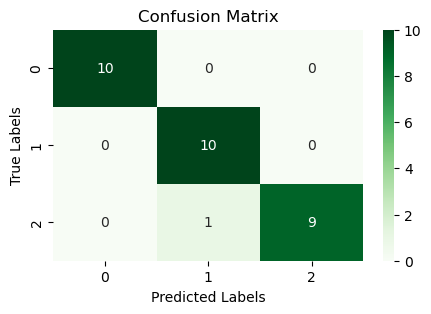

In [41]:
#plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [42]:
#8 Fine Tuning Model

#KNN
#Trying different value of k to find the best k value

neighbors = range(1,40)
train_scores = []
test_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    #Compute the training accuracy and append data to the train_score list
    train_scores.append(knn.score(X_train, y_train))

    #Compute the test accuracy and append data to the test_score list
    test_scores.append(knn.score(X_test, y_test))

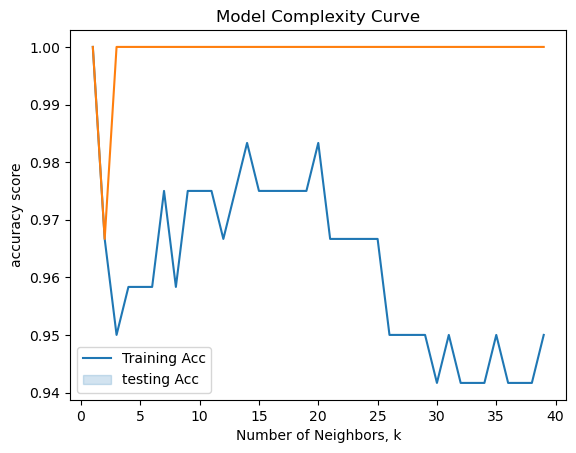

In [43]:
sns.lineplot(x=neighbors, y = train_scores, label = "Train Accuracy")
sns.lineplot(x=neighbors, y = test_scores, label = "Test Accuracy")
#set title and labels of the plot

plt.title("Model Complexity Curve")
plt.xlabel("Number of Neighbors, k")
plt.ylabel("accuracy score")
plt.legend(labels = ["Training Acc", "testing Acc"])

#Display
plt.show()


MACHINE LEARNING MODEL PIPELINE

In [44]:
#Perform Scalling
#Perform model from classification

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


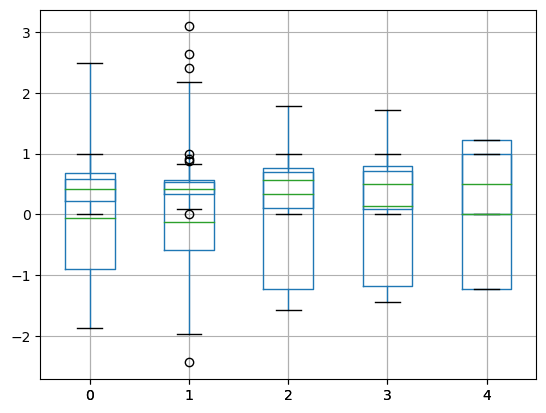

In [45]:
from sklearn import preprocessing
SS = preprocessing.StandardScaler()
MMS = preprocessing.MinMaxScaler()

df_scaled = SS.fit_transform(df)
df_scaled = pd.DataFrame (df_scaled, index = df.index)

print(df_scaled.boxplot())

df_mms = MMS.fit_transform(df)
df_mms = pd.DataFrame(df_mms, index = df.index)
print(df_mms.boxplot())


Axes(0.125,0.11;0.775x0.77)


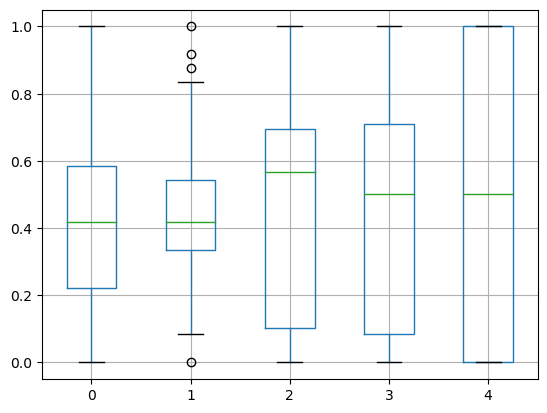

In [46]:
#Min Max Scaler will make the range to 0 to 1
df_mms = MMS.fit_transform(df)
#convet numpy to dataframe
df_mms = pd.DataFrame(df_mms, index = df.index)
#range of df became -3 to 3
print(df_mms.boxplot())

In [47]:
#perform machine learning model such as
#Logistic Regression, decision Tree,  Random Forest and SVC
#MMS, SC

from sklearn.pipeline import Pipeline

#model import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#metrics import
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#initiate all the model
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
SVC = SVC()

#Create pipeline for each model with MinMaxScaler and Standard Scaler
pipeline_mms_lr = Pipeline([('mms',MMS),('lr', LR)])
pipeline_ss_lr = Pipeline([('s',SS),('lr', LR)])

pipeline_mms_dr = Pipeline([('mms',MMS),('lr', DT)])
pipeline_ss_dr = Pipeline([('ss',SS),('lr', DT)])

pipeline_mms_rf = Pipeline([('mms',MMS),('lr', RF)])
pipeline_ss_rf = Pipeline([('ss',SS),('lr', RF)])

pipeline_mms_svc = Pipeline([('mms',MMS),('lr', SVC)])
pipeline_ss_svc = Pipeline([('ss',SS),('lr', SVC)])


In [48]:
#Create list of all pipelines and corresponding names
PP = [pipeline_mms_lr, pipeline_ss_lr,
      pipeline_mms_dr, pipeline_ss_dr,
      pipeline_mms_rf, pipeline_ss_rf,
      pipeline_mms_svc,pipeline_ss_svc]

PP_names = ['MinMAxScaler + LogisticRegression',
            'StandardScaler + LogisticRegression',
            'MinMaxScaler + DecisionTree',
            'StandardScaler + DecisionTree',
            'MinMAxScaler + RandomForest',
            'StandardScaler + RandomForest',
            'MinMAxScaler + SVC',
            'StandardScaler + SVC']

#model_score_df = pd.DataFrame(columns = ['Model','Accuracy_Score', 'F1 Score'])
model_score_df=pd.DataFrame()
PP[0].fit(X_train, y_train)
y_predict = PP[0].predict(X_test)

In [49]:
#Loop over each pipeline, train it, and evaluate the performance
for i in range (len(PP)):
    
    #Train the model
    PP[i].fit(X_train, y_train)
    #Prediction of the test set
    y_pred = PP[i].predict(X_test)

    #calculate accuracy_score, f1_score of each model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')

    #store the accuracy and F1_score of each model in the dataframe
    acc_and_f1 = pd.DataFrame({'Model': [PP_names[i]],
                           'Accuracy Score': [accuracy],
                            'F1 Score': [f1]})

    model_score_df = pd.concat([model_score_df, acc_and_f1])

In [50]:
#print the model scores
print(model_score_df.sort_values(by=['Accuracy Score', 'F1 Score'], ascending = False))

                                 Model  Accuracy Score  F1 Score
0          MinMaxScaler + DecisionTree        1.000000  1.000000
0        StandardScaler + DecisionTree        1.000000  1.000000
0        StandardScaler + RandomForest        1.000000  1.000000
0                 StandardScaler + SVC        1.000000  1.000000
0  StandardScaler + LogisticRegression        0.966667  0.966583
0          MinMAxScaler + RandomForest        0.966667  0.966583
0                   MinMAxScaler + SVC        0.966667  0.966583
0    MinMAxScaler + LogisticRegression        0.933333  0.933333


In [51]:
print("The best model is "+ model_score_df.max().iloc[0] +
      " with an accuracy score of " + str(model_score_df.max().iloc[1]) + 
      " and F1 score of " + str(model_score_df.max().iloc[2]) ) #StandardScaler and SVC has been chosen

The best model is StandardScaler + SVC with an accuracy score of 1.0 and F1 score of 1.0


EVALUATE MODEL

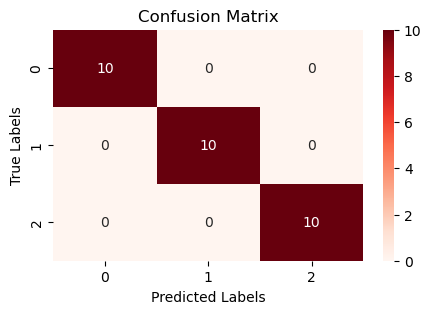

In [52]:
#Confusion matrix of the model
y_pred = pipeline_ss_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [53]:
#Classification report
labels = iris['target_names']

cr = classification_report(y_test, y_pred, target_names = labels)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [54]:
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [55]:
#Model saving fo future use
import os
import pickle

#saving the best model
MODEL_PATH = os.path.join(os.getcwd(), 'Irismodel.pkl')

#save the model
with open(MODEL_PATH, 'wb') as file:
    pickle.dump(pipeline_ss_svc, file)

In [56]:
#load the model
with open(MODEL_PATH, 'rb') as file:
    iris_model = pickle.load (file)

In [57]:
#use the model
y_pred = iris_model.predict([[1.0,2.0,3.0,4.0]])

c:\Anaconda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
print(y_pred) #The model predict based on the features

[1]
